# Estadística Descriptiva

# Base de datos

Trabajaremos con la Base de Datos Bancor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importo las librerias que voy a necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as stat
import scipy.stats as st
from statistics import stdev
from scipy.stats import t

In [ ]:
#Abro la base del Drive
df = pd.read_excel("/content/drive/MyDrive/Bancor/Base de datos Bancor.xlsx") # cambiar el link por el propio
#Visualizo los datos
df.head()

,idFacu,TIENE_TARJETA_VISA,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,MOB_TARJETAS_DE_CREDITO,CANT_TARJETAS_CREDITO,EDAD,...,peor_sit_no_bancor_6meses,max_mora_pp,max_mora_visa,max_mora_cordobesa,max_mora_prod_activos,SEGMENTO,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,target,dirty
0,1,0,0,0.000000,0.000000,0,0.000000,0,0,74,...,0,0,0,0,0,JUBILADO NACION,1,0,0,0
1,2,0,0,0.000000,0.000000,0,0.000000,115,0,78,...,0,0,0,0,0,JUBILADO NACION,0,0,0,0
2,4,0,78,1465.534634,1465.534634,1,9209.702008,78,1,84,...,1,0,0,0,0,JUBILADO NACION,1,1,0,0
3,5,0,114,0.000000,0.000000,1,0.000000,114,1,83,...,0,0,0,0,0,JUBILADO NACION,0,0,0,0
4,6,0,102,31104.196271,8184.041677,1,50443.631583,102,1,75,...,1,0,0,0,0,JUBILADO NACION,1,1,0,0


# Exploración de datos

**Clasificación de variables**

Explorar los datos es una tarea muy importante, ya que es necesario conocer la base de datos con la que se esta trabajando.
Para ello es necesario saber que variables tengo, cuales son su tipo, que valores o categorias pueden tener.
Tambien es necesario tener en cuenta la cantidad de filas que tiene, si existen registros nulos y ver que se hace con los mismos.

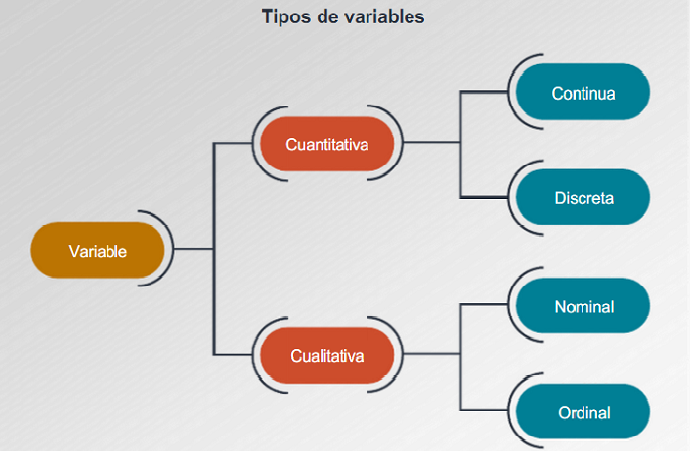

En python, los tipos de datos se sintetizan en:
  
1.   Numéricos

*   float: numeros con decimales
*   Integer: numeros enteros

2.   Categóricos

*   String: cadenas


In [ ]:
# Analizo un poco la base de datos
df.head(10) # de forma alternativa podemos ver df.sample(10)

,idFacu,TIENE_TARJETA_VISA,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,MOB_TARJETAS_DE_CREDITO,CANT_TARJETAS_CREDITO,EDAD,...,peor_sit_no_bancor_6meses,max_mora_pp,max_mora_visa,max_mora_cordobesa,max_mora_prod_activos,SEGMENTO,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,target,dirty
0,1,0,0,0.000000,0.000000,0,0.000000,0,0,74,...,0,0,0,0,0,JUBILADO NACION,1,0,0,0
1,2,0,0,0.000000,0.000000,0,0.000000,115,0,78,...,0,0,0,0,0,JUBILADO NACION,0,0,0,0
2,4,0,78,1465.534634,1465.534634,1,9209.702008,78,1,84,...,1,0,0,0,0,JUBILADO NACION,1,1,0,0
3,5,0,114,0.000000,0.000000,1,0.000000,114,1,83,...,0,0,0,0,0,JUBILADO NACION,0,0,0,0
4,6,0,102,31104.196271,8184.041677,1,50443.631583,102,1,75,...,1,0,0,0,0,JUBILADO NACION,1,1,0,0
5,9,0,0,0.000000,0.000000,0,0.000000,0,0,72,...,1,0,0,0,0,JUBILADO NACION,1,1,0,0
6,10,0,1,0.000000,0.000000,1,0.000000,1,0,74,...,0,0,0,0,0,JUBILADO NACION,1,0,0,0
7,11,0,51,30274.746104,3281.897991,1,24714.051315,51,1,79,...,0,0,0,0,0,JUBILADO NACION,1,0,0,0
8,12,0,114,2883.858113,2883.858113,1,15586.734681,114,1,85,...,0,0,0,0,0,JUBILADO NACION,1,0,0,0
9,13,0,69,0.000000,0.000000,1,1287.940674,69,1,71,...,1,0,0,0,0,JUBILADO NACION,0,1,0,0


In [ ]:
df.dtypes #filas, columnas

idFacu                               int64
TIENE_TARJETA_VISA                   int64
ANTIGUEDAD_CORDOBESA                 int64
CORDOBESA_MONTO_SALDO_TOTAL        float64
CORDOBESA_MONTO_SALDO_RESUMEN      float64
TIENE_TARJETA_CORDOBESA              int64
SUM_CONSUMOS_TC_ULT_6M             float64
MOB_TARJETAS_DE_CREDITO              int64
CANT_TARJETAS_CREDITO                int64
EDAD                                 int64
ESTADO_CIVIL                        object
SEXO                                object
ANTIGUEDAD_PRESTAMOS_PERSONALES      int64
CANT_PMOS_PERSONALES                 int64
CANT_PMOS_HIPOTECARIOS               int64
CANT_ACREDITACION_HABER_ULT90D       int64
TIENE_CUENTA_BASICA                  int64
INGRESOS_NETOS                     float64
TIENE_HOME_BANKING_ULT3M             int64
CANT_TARJ_DEBITO_TRANSACCIONES       int64
CORDOBESA_MAXIMA_MORA_ULT12M         int64
ENDEUDAMIENTO                      float64
RIESGO_ASOCIADO_LINEA               object
SALDO_ACTUA

In [ ]:
df.info() #otra forma de ver infomación de nuestro dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332 entries, 0 to 10331
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   idFacu                           10332 non-null  int64  
 1   TIENE_TARJETA_VISA               10332 non-null  int64  
 2   ANTIGUEDAD_CORDOBESA             10332 non-null  int64  
 3   CORDOBESA_MONTO_SALDO_TOTAL      10332 non-null  float64
 4   CORDOBESA_MONTO_SALDO_RESUMEN    10332 non-null  float64
 5   TIENE_TARJETA_CORDOBESA          10332 non-null  int64  
 6   SUM_CONSUMOS_TC_ULT_6M           10332 non-null  float64
 7   MOB_TARJETAS_DE_CREDITO          10332 non-null  int64  
 8   CANT_TARJETAS_CREDITO            10332 non-null  int64  
 9   EDAD                             10332 non-null  int64  
 10  ESTADO_CIVIL                     10332 non-null  object 
 11  SEXO                             10332 non-null  object 
 12  ANTIGUEDAD_PRESTAM

In [ ]:
#Podemos necesitar cambiar en algun momento cambiar algun formato y se realiza mediante el comando astype
# Convertir el campo record_id de integer a float
#df['record_id'] = df['record_id'].astype('float64')
#df['record_id'].dtype

**Trabajo con valores nulos**

In [ ]:
# ver si hay valores nulos o no que nos puedan molestar mas adelante
print(df.isnull().sum())

idFacu                                 0
TIENE_TARJETA_VISA                     0
ANTIGUEDAD_CORDOBESA                   0
CORDOBESA_MONTO_SALDO_TOTAL            0
CORDOBESA_MONTO_SALDO_RESUMEN          0
TIENE_TARJETA_CORDOBESA                0
SUM_CONSUMOS_TC_ULT_6M                 0
MOB_TARJETAS_DE_CREDITO                0
CANT_TARJETAS_CREDITO                  0
EDAD                                   0
ESTADO_CIVIL                           0
SEXO                                   0
ANTIGUEDAD_PRESTAMOS_PERSONALES        0
CANT_PMOS_PERSONALES                   0
CANT_PMOS_HIPOTECARIOS                 0
CANT_ACREDITACION_HABER_ULT90D         0
TIENE_CUENTA_BASICA                    0
INGRESOS_NETOS                         0
TIENE_HOME_BANKING_ULT3M               0
CANT_TARJ_DEBITO_TRANSACCIONES         0
CORDOBESA_MAXIMA_MORA_ULT12M           0
ENDEUDAMIENTO                          0
RIESGO_ASOCIADO_LINEA                  0
SALDO_ACTUAL_REFINAN_VIGENTE       10189
CANT_SIT_BANCOR_

Por ejemplo, la variable CONSUMO_6M_VISA tiene 6017 valores perdidos o nulos. Vamos a reemplazarlos por cero.

In [ ]:
# Si quiero reemplazar los nulos por cero, primero tengo que copiar el dataframe (para no pisar el original)
df1 = df.copy()
# Completar todos los valores NaN con ceros
df1['CONSUMO_6M_VISA'] = df1['CONSUMO_6M_VISA'].fillna(0)

In [ ]:
#Verifico que ahora no hay valores nulos en la variable
print(df1.isnull().sum())

idFacu                                 0
TIENE_TARJETA_VISA                     0
ANTIGUEDAD_CORDOBESA                   0
CORDOBESA_MONTO_SALDO_TOTAL            0
CORDOBESA_MONTO_SALDO_RESUMEN          0
TIENE_TARJETA_CORDOBESA                0
SUM_CONSUMOS_TC_ULT_6M                 0
MOB_TARJETAS_DE_CREDITO                0
CANT_TARJETAS_CREDITO                  0
EDAD                                   0
ESTADO_CIVIL                           0
SEXO                                   0
ANTIGUEDAD_PRESTAMOS_PERSONALES        0
CANT_PMOS_PERSONALES                   0
CANT_PMOS_HIPOTECARIOS                 0
CANT_ACREDITACION_HABER_ULT90D         0
TIENE_CUENTA_BASICA                    0
INGRESOS_NETOS                         0
TIENE_HOME_BANKING_ULT3M               0
CANT_TARJ_DEBITO_TRANSACCIONES         0
CORDOBESA_MAXIMA_MORA_ULT12M           0
ENDEUDAMIENTO                          0
RIESGO_ASOCIADO_LINEA                  0
SALDO_ACTUAL_REFINAN_VIGENTE       10189
CANT_SIT_BANCOR_

También podríamos borrar de la base de datos los datos incompletos

In [ ]:
# También puedo borrar del dataframe los datos incompletos
df_na = df.dropna()

In [ ]:
print(df_na.isnull().sum())

idFacu                             0
TIENE_TARJETA_VISA                 0
ANTIGUEDAD_CORDOBESA               0
CORDOBESA_MONTO_SALDO_TOTAL        0
CORDOBESA_MONTO_SALDO_RESUMEN      0
TIENE_TARJETA_CORDOBESA            0
SUM_CONSUMOS_TC_ULT_6M             0
MOB_TARJETAS_DE_CREDITO            0
CANT_TARJETAS_CREDITO              0
EDAD                               0
ESTADO_CIVIL                       0
SEXO                               0
ANTIGUEDAD_PRESTAMOS_PERSONALES    0
CANT_PMOS_PERSONALES               0
CANT_PMOS_HIPOTECARIOS             0
CANT_ACREDITACION_HABER_ULT90D     0
TIENE_CUENTA_BASICA                0
INGRESOS_NETOS                     0
TIENE_HOME_BANKING_ULT3M           0
CANT_TARJ_DEBITO_TRANSACCIONES     0
CORDOBESA_MAXIMA_MORA_ULT12M       0
ENDEUDAMIENTO                      0
RIESGO_ASOCIADO_LINEA              0
SALDO_ACTUAL_REFINAN_VIGENTE       0
CANT_SIT_BANCOR_MAYOR1             0
CANT_SIT_NO_BANCOR_MAYOR1          0
CONSUMO_6M_CORDOBESA               0
A

In [ ]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 391 to 9849
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   idFacu                           57 non-null     int64  
 1   TIENE_TARJETA_VISA               57 non-null     int64  
 2   ANTIGUEDAD_CORDOBESA             57 non-null     int64  
 3   CORDOBESA_MONTO_SALDO_TOTAL      57 non-null     float64
 4   CORDOBESA_MONTO_SALDO_RESUMEN    57 non-null     float64
 5   TIENE_TARJETA_CORDOBESA          57 non-null     int64  
 6   SUM_CONSUMOS_TC_ULT_6M           57 non-null     float64
 7   MOB_TARJETAS_DE_CREDITO          57 non-null     int64  
 8   CANT_TARJETAS_CREDITO            57 non-null     int64  
 9   EDAD                             57 non-null     int64  
 10  ESTADO_CIVIL                     57 non-null     object 
 11  SEXO                             57 non-null     object 
 12  ANTIGUEDAD_PRESTAMOS

**Valores duplicados**

In [ ]:
# poner el registro para ver duplicados
df[df.duplicated()]

,idFacu,TIENE_TARJETA_VISA,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,MOB_TARJETAS_DE_CREDITO,CANT_TARJETAS_CREDITO,EDAD,...,peor_sit_no_bancor_6meses,max_mora_pp,max_mora_visa,max_mora_cordobesa,max_mora_prod_activos,SEGMENTO,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,target,dirty


In [ ]:
df[df.duplicated(subset=['idFacu'], keep=False)].sort_values(['idFacu'])

,idFacu,TIENE_TARJETA_VISA,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,MOB_TARJETAS_DE_CREDITO,CANT_TARJETAS_CREDITO,EDAD,...,peor_sit_no_bancor_6meses,max_mora_pp,max_mora_visa,max_mora_cordobesa,max_mora_prod_activos,SEGMENTO,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,target,dirty


# Organización y resumen de datos

Dependiendo del tipo de variable que se esta analizando es de gran utilidad realizar visualizaciones ya que, de manera rapida, nos dan información de como la misma se comporta. También resulta útil resumir la información en tablas de distribución de freuencias.

Es util armar tablas de frecuencias que me reflejan cuales son las categorias existentes en cada variable, cual es su frecuencia, y a partir de dicha informacion poder tomar decisiones como por ejemplo agrupar variables.

**Variables categóricas**



Es útil armar tablas de frecuencias que me reflejan cuales son las categorias existentes en cada variable, cual es su frecuencia, y a partir de dicha informacion poder tomar decisiones.

Trabajaremos con las variables Sexo y Estado Civil de nuestro dataset.

In [ ]:
#Cálculo de frecuencias absolutas
df.SEXO.value_counts()

FEMENINO     5764
MASCULINO    4568
Name: SEXO, dtype: int64

In [ ]:
df.ESTADO_CIVIL.value_counts()

Soltero/a       5825
Casado/a        2847
Viudo/a          960
Divorciado/a     623
Conviviente       72
Union Civil        5
Name: ESTADO_CIVIL, dtype: int64

In [ ]:
#Armo la tabla con frecuencias absolutas para después calcular las frecuencias relativas
tabla_frec_est_civil=pd.value_counts(df.ESTADO_CIVIL).to_frame().reset_index()
tabla_frec_est_civil.columns= ("Estado civil","fa")
tabla_frec_est_civil

,Estado civil,fa
0,Soltero/a,5825
1,Casado/a,2847
2,Viudo/a,960
3,Divorciado/a,623
4,Conviviente,72
5,Union Civil,5


In [ ]:
# Calculo las frecuencias relativas
fr=(df.ESTADO_CIVIL.value_counts()/len(df.ESTADO_CIVIL))*100
lis=fr.values
tabla_frec_est_civil["fr"]=lis
tabla_frec_est_civil

,Estado civil,fa,fr
0,Soltero/a,5825,56.378242
1,Casado/a,2847,27.555168
2,Viudo/a,960,9.291521
3,Divorciado/a,623,6.029810
4,Conviviente,72,0.696864
5,Union Civil,5,0.048393


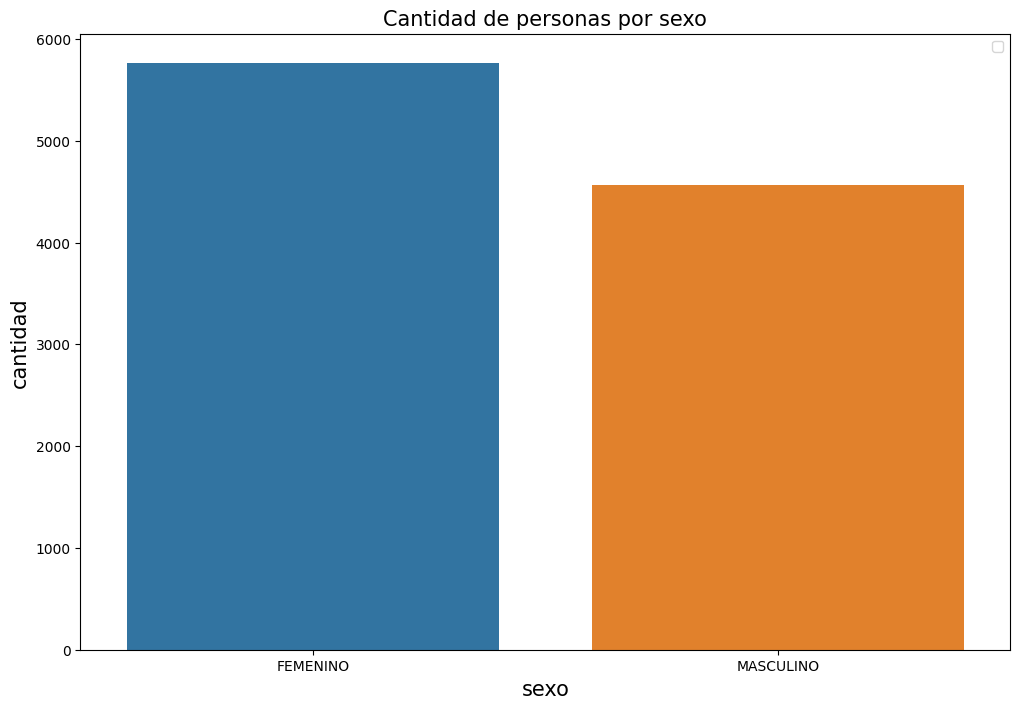

In [ ]:
#Gráfico de barras para Sexo
plt.figure(figsize=(12,8)) # elijo el tamaño de mi gráfica
sn.countplot(data=df, x='SEXO')
plt.ylabel('cantidad',size=15)
plt.xlabel('sexo', size=15)
plt.title('Cantidad de personas por sexo', size=15)
plt.legend()



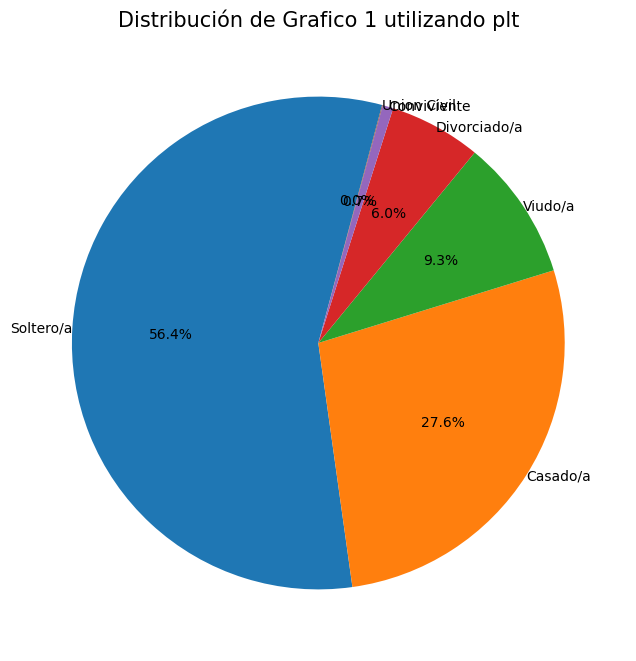

In [ ]:
#Grafico de tortas
plt.figure(figsize=(12,8)) # elijo el tamaño de mi gráfica
labels=tabla_frec_est_civil['Estado civil']
plt.pie(data=tabla_frec_est_civil, x='fr', labels=labels, labeldistance=1 , autopct='%1.1f%%', shadow=False, startangle=75)
plt.title('Distribución de Grafico 1 utilizando plt',size=15)
#plt.figlegend()
plt.show()

#plt.subplot(1, 2, 2)
#df['ESTADO_CIVIL'].value_counts().plot(kind='pie')
#plt.title('Estado civil')
#plt.rc('legend', fontsize=100)
#plt.title('Grafico 1 utilizando pandas')
#plt.show()


Text(0.5, 1.0, 'Cantidad de personas segun su estado civil')

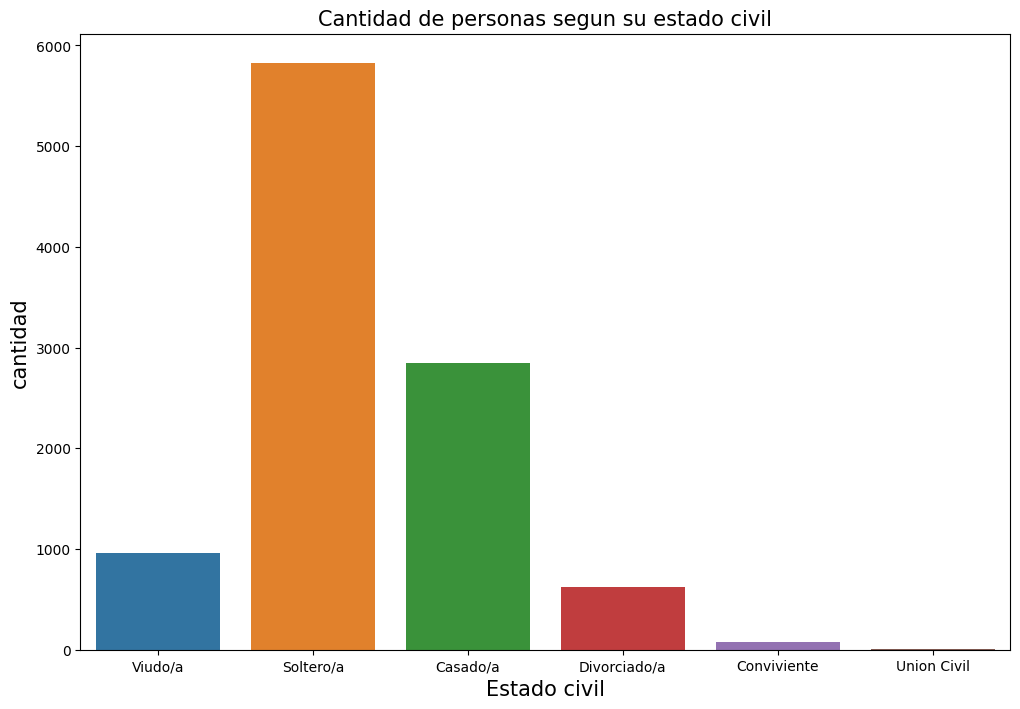

In [ ]:
#Gráfico de barras para Estado civil
plt.figure(figsize=(12,8)) # elijo el tamaño de mi gráfica
sn.countplot(data=df, x='ESTADO_CIVIL')
plt.ylabel('cantidad',size=15)
plt.xlabel('Estado civil',size=15)
plt.title('Cantidad de personas segun su estado civil',size=15)
#ver si es necesario agregarle la etiqueta.
#ver como ordenar el grafico de mayor a menor

**Variables numéricas discretas**

Trabajaremos con la variable Cantidad de tarjetas de crédito del dataset.

In [ ]:
tabla_frec_cant_tarjetas=pd.value_counts(df.CANT_TARJETAS_CREDITO).to_frame().reset_index()
tabla_frec_cant_tarjetas.columns= ("Cantidad de tarjetas","fa")
tabla_frec_cant_tarjetas

,Cantidad de tarjetas,fa
0,1,6014
1,0,2906
2,2,1401
3,3,11


In [ ]:
#Agrego las frecuencias relativas

fr=(df.CANT_TARJETAS_CREDITO.value_counts()/len(df.CANT_TARJETAS_CREDITO))*100
lis=fr.values
tabla_frec_cant_tarjetas["fr"]=lis
tabla_frec_cant_tarjetas

,Cantidad de tarjetas,fa,fr
0,1,6014,58.207511
1,0,2906,28.126210
2,2,1401,13.559814
3,3,11,0.106465


In [ ]:
from pickle import FALSE
#obtengo las frecuencias acumuladas
# para eso armamos una funcion que me acumule los valores
Fa=tabla_frec_cant_tarjetas["fa"].values

a=[]
b=0
for c in Fa:
  b=c+b
  a.append(b)

In [ ]:
tabla_frec_cant_tarjetas["Faa"]=a
tabla_frec_cant_tarjetas

,Cantidad de tarjetas,fa,fr,Faa
0,1,6014,58.207511,6014
1,0,2906,28.126210,8920
2,2,1401,13.559814,10321
3,3,11,0.106465,10332


In [ ]:
#Hacemos lo mismo con frecuencias relativas acumuladas
fra=tabla_frec_cant_tarjetas["fr"].values
a=[]
b=0
for c in fra:
  b=c+b
  a.append(b)

tabla_frec_cant_tarjetas["Fra"]=a
tabla_frec_cant_tarjetas

,Cantidad de tarjetas,fa,fr,Faa,Fra
0,1,6014,58.207511,6014,58.207511
1,0,2906,28.126210,8920,86.333720
2,2,1401,13.559814,10321,99.893535
3,3,11,0.106465,10332,100.000000


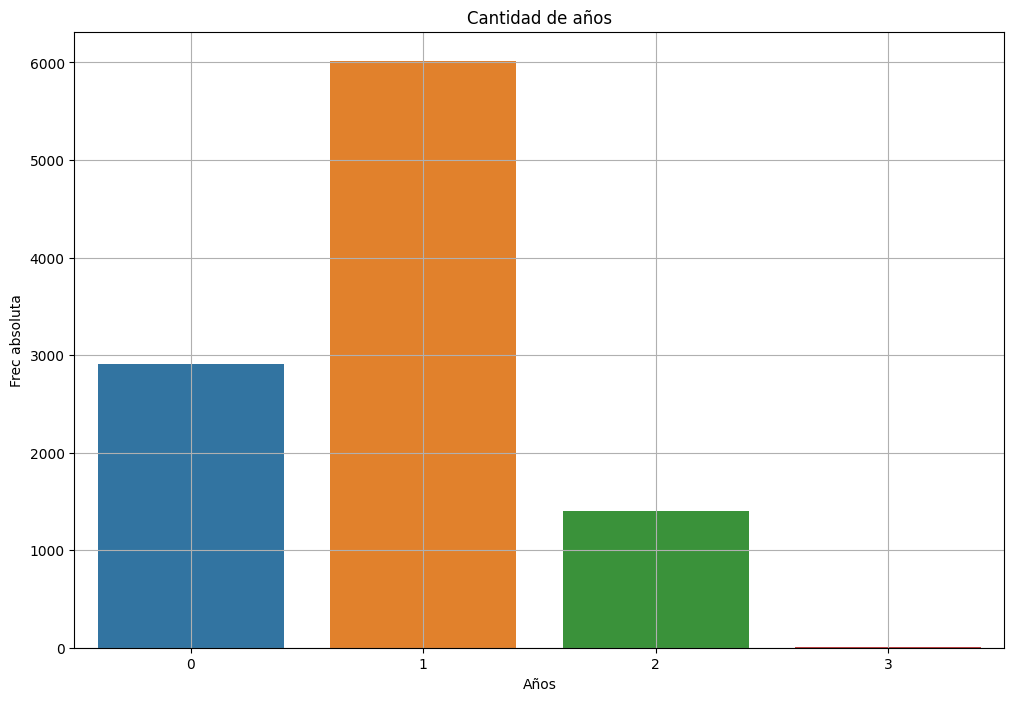

In [ ]:
#Gráfico de bastones
plt.figure(figsize=(12,8)) # elijo el tamaño de mi gráfica
sn.countplot(data=df, x='CANT_TARJETAS_CREDITO')
plt.ylabel('Frec absoluta')
plt.xlabel('Años')
plt.title('Cantidad de años')
#plt.legend()
plt.grid(True)  #quiero poner grilla


**Variables numéricas continuas**

In [ ]:
df["EDAD"] = pd.cut(df["EDAD"], bins=6)

(df.groupby("EDAD")
  .agg(frequency=("EDAD", "count")))

,frequency
EDAD,
"(19.923, 32.833]",1026
"(32.833, 45.667]",2732
"(45.667, 58.5]",2650
"(58.5, 71.333]",2605
"(71.333, 84.167]",1249
"(84.167, 97.0]",70


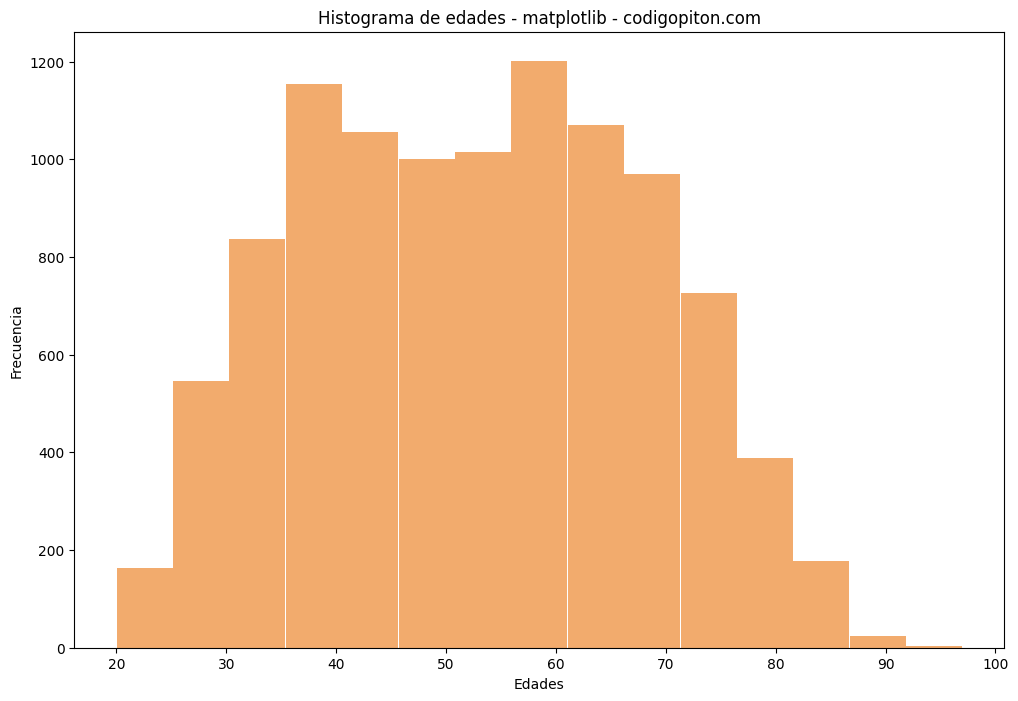

In [ ]:
plt.figure(figsize=(12,8))
intervalos = range(min(df.EDAD), max(df.EDAD) + 2)
plt.hist(data=df, x='EDAD', bins=15, color='#F2AB6D', rwidth=0.99) #binds es el nro de intervalos
plt.title('Histograma de edades - matplotlib - codigopiton.com')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks()
plt.show()

**Análisis de dos variables cualitativas**

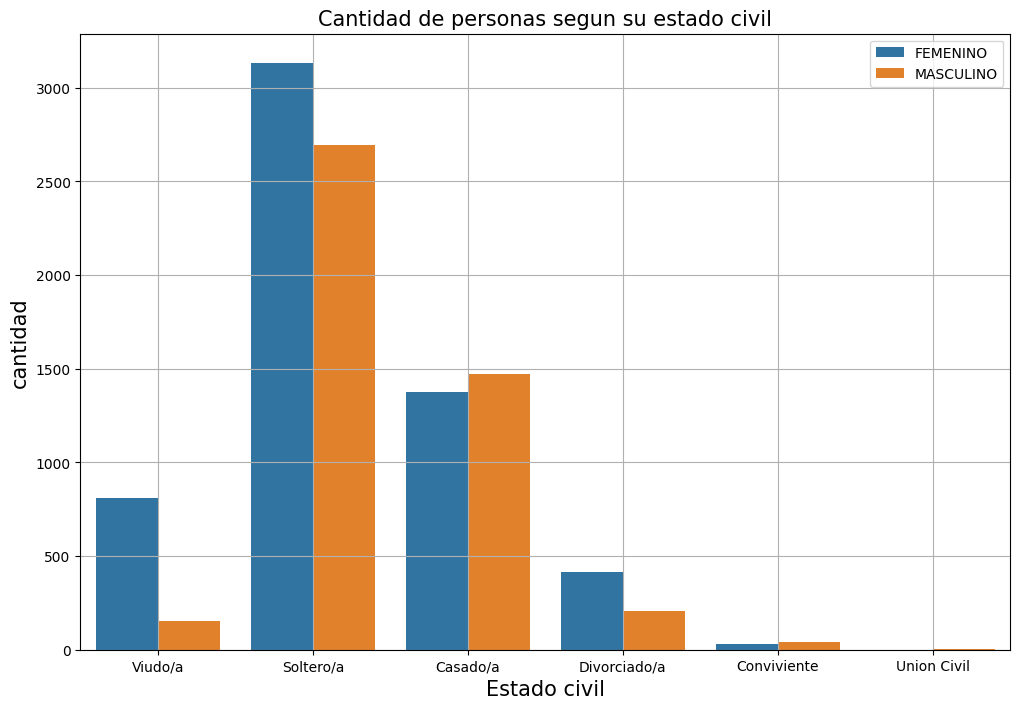

In [ ]:
#Puedo necesitar segmentarlo por alguna variable de interes
#Gráfico Estado civil por Sexo
plt.figure(figsize=(12,8)) # elijo el tamaño de mi gráfica
sn.countplot(data=df, x='ESTADO_CIVIL', hue='SEXO')
plt.ylabel('cantidad',size=15)
plt.xlabel('Estado civil',size=15)
plt.title('Cantidad de personas segun su estado civil',size=15)
plt.legend()
plt.grid(True)  #quiero poner grilla

<Figure size 1200x800 with 0 Axes>

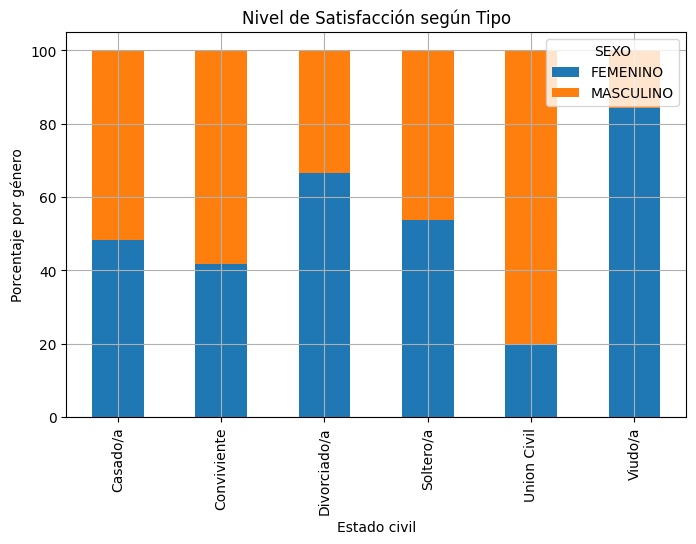

In [ ]:
#Gráfico de barras apiladas
plt.figure(figsize=(12,8)) # elijo el tamaño de mi gráfica
pd.crosstab(index=df['ESTADO_CIVIL'],
            columns=df['SEXO']
                  ).apply(lambda r: r/r.sum()*100,
                          axis=1).plot(kind='bar', stacked=True,figsize=(8,5))
plt.title("Nivel de Satisfacción según Tipo")
plt.xlabel("Estado civil")
plt.ylabel("Porcentaje por género")
plt.legend
plt.grid(True)

In [ ]:
# Tabla de contingencia Variables Satisf vs Sexo
pd.crosstab(index=df['SEXO'], columns=df['ESTADO_CIVIL'], margins=True)

ESTADO_CIVIL,Casado/a,Conviviente,Divorciado/a,Soltero/a,Union Civil,Viudo/a,All
SEXO,,,,,,,
FEMENINO,1377,30,415,3132,1,809,5764
MASCULINO,1470,42,208,2693,4,151,4568
All,2847,72,623,5825,5,960,10332


In [ ]:
# tabla de contingencia frecuencias relativas (base total de observaciones)
pd.crosstab(index=df['SEXO'], columns=df['ESTADO_CIVIL'],
            margins=True).apply(lambda r: r/len(df) #*100
                                ,axis=1)

ESTADO_CIVIL,Casado/a,Conviviente,Divorciado/a,Soltero/a,Union Civil,Viudo/a,All
SEXO,,,,,,,
FEMENINO,0.133275,0.002904,0.040166,0.303136,0.000097,0.078300,0.557878
MASCULINO,0.142276,0.004065,0.020132,0.260647,0.000387,0.014615,0.442122
All,0.275552,0.006969,0.060298,0.563782,0.000484,0.092915,1.000000


In [ ]:
# tabla de contingencia condicionadas por fila
pd.crosstab(index=df['SEXO'], columns=df['ESTADO_CIVIL'],
            margins=True, normalize='index')

ESTADO_CIVIL,Casado/a,Conviviente,Divorciado/a,Soltero/a,Union Civil,Viudo/a
SEXO,,,,,,
FEMENINO,0.238897,0.005205,0.071999,0.543373,0.000173,0.140354
MASCULINO,0.321804,0.009194,0.045534,0.589536,0.000876,0.033056
All,0.275552,0.006969,0.060298,0.563782,0.000484,0.092915


In [ ]:
# tabla de contingencia condicionadas por columna
pd.crosstab(index=df['SEXO'], columns=df['ESTADO_CIVIL'],
            margins=True, normalize='columns')

ESTADO_CIVIL,Casado/a,Conviviente,Divorciado/a,Soltero/a,Union Civil,Viudo/a,All
SEXO,,,,,,,
FEMENINO,0.483667,0.416667,0.666132,0.537682,0.2,0.842708,0.557878
MASCULINO,0.516333,0.583333,0.333868,0.462318,0.8,0.157292,0.442122


# Cálculo e interpretación de medidas descriptivas.

**Medidas descriptivas básicas**

In [ ]:
df.describe()

,idFacu,TIENE_TARJETA_VISA,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,MOB_TARJETAS_DE_CREDITO,CANT_TARJETAS_CREDITO,ANTIGUEDAD_PRESTAMOS_PERSONALES,...,sin_productos_activos_6meses,peor_sit_no_bancor_6meses,max_mora_pp,max_mora_visa,max_mora_cordobesa,max_mora_prod_activos,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,target,dirty
count,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,...,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000
mean,8037.107433,0.300813,63.303620,18072.723232,6326.510933,0.909021,32041.214531,67.532811,0.856465,11.562718,...,0.057104,1.016357,1.750678,0.307685,2.058556,3.019938,0.968641,0.896825,0.043167,0.098626
std,5605.763230,0.458634,40.828192,27136.811598,10949.726554,0.287594,51618.540548,39.776096,0.632894,12.961050,...,0.232053,1.137112,18.322601,7.814523,17.062780,22.645005,0.481970,1.078383,0.203242,0.298173
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3386.750000,0.000000,26.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,6585.000000,0.000000,61.000000,7465.086195,2521.084958,1.000000,12531.468738,66.000000,1.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,11931.750000,1.000000,104.000000,26979.747394,8479.591258,1.000000,44214.186671,105.000000,1.000000,21.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,19998.000000,1.000000,115.000000,440168.612690,300739.894240,1.000000,804021.381040,399.000000,3.000000,86.000000,...,1.000000,5.000000,606.000000,600.000000,416.000000,606.000000,5.000000,5.000000,1.000000,1.000000


**Medida de posición: Media aritmética**

In [ ]:
#calculo de la media aritmetica para una variable particular utilizando pandas
df['ANTIGUEDAD_CORDOBESA'].mean()

63.303619821912505

In [ ]:
#calculo de la media aritmetica para una variable particular utilizando numpy
np.mean(df['ANTIGUEDAD_CORDOBESA'])

63.303619821912505

In [ ]:
#Puedo querer calcular medidas descriptivas segun algun variable de segmentacion

df[df.SEXO == 'FEMENINO'].ANTIGUEDAD_CORDOBESA.mean()

63.69465648854962

<ipython-input-62-6a842087a6b2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sn.barplot(data=df, x='SEXO', y='CORDOBESA_MONTO_SALDO_RESUMEN', ci=False)


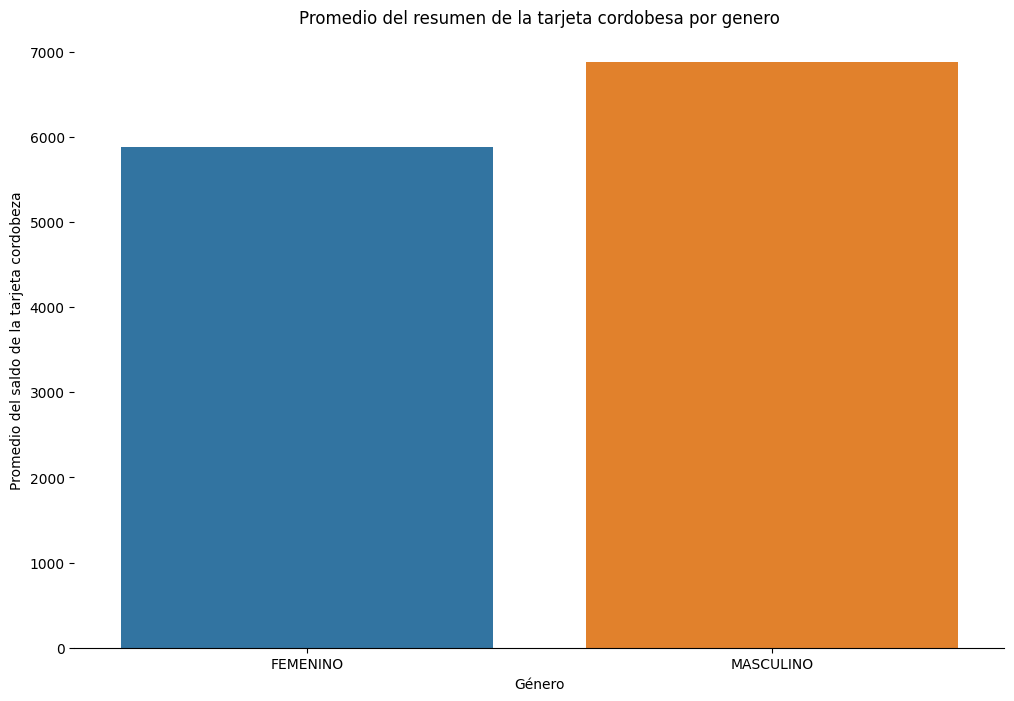

In [ ]:
plt.figure(figsize=(12,8))
sn.barplot(data=df, x='SEXO', y='CORDOBESA_MONTO_SALDO_RESUMEN', ci=False)
plt.ylabel('Promedio del saldo de la tarjeta cordobeza')
plt.xlabel('Género')
plt.title('Promedio del resumen de la tarjeta cordobesa por genero')
sn.despine(left=True)

<ipython-input-63-0c7a38c4629c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sn.barplot(data=df, x='ESTADO_CIVIL', y='CORDOBESA_MONTO_SALDO_RESUMEN', hue='SEXO', ci=False)


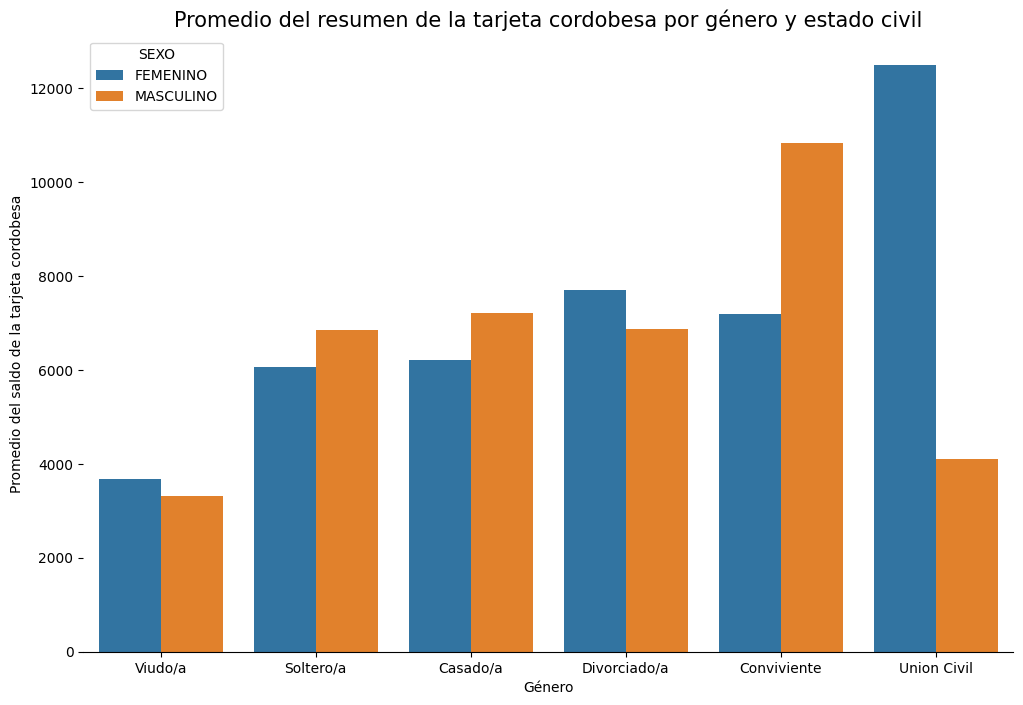

In [ ]:
#visualizar el promedio de los ingresos
plt.figure(figsize=(12,8))
sn.barplot(data=df, x='ESTADO_CIVIL', y='CORDOBESA_MONTO_SALDO_RESUMEN', hue='SEXO', ci=False)
plt.ylabel('Promedio del saldo de la tarjeta cordobesa')
plt.xlabel('Género')
plt.title('Promedio del resumen de la tarjeta cordobesa por género y estado civil', size=15)
sn.despine(left=True)

**Medidas de posición:**
**Mediana**

In [ ]:
df.median() # para todas las variables

<ipython-input-64-e86cb81d5db6>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median() # para todas las variables


idFacu                              6585.000000
TIENE_TARJETA_VISA                     0.000000
ANTIGUEDAD_CORDOBESA                  61.000000
CORDOBESA_MONTO_SALDO_TOTAL         7465.086195
CORDOBESA_MONTO_SALDO_RESUMEN       2521.084958
TIENE_TARJETA_CORDOBESA                1.000000
SUM_CONSUMOS_TC_ULT_6M             12531.468738
MOB_TARJETAS_DE_CREDITO               66.000000
CANT_TARJETAS_CREDITO                  1.000000
ANTIGUEDAD_PRESTAMOS_PERSONALES        8.000000
CANT_PMOS_PERSONALES                   1.000000
CANT_PMOS_HIPOTECARIOS                 0.000000
CANT_ACREDITACION_HABER_ULT90D         2.000000
TIENE_CUENTA_BASICA                    0.000000
INGRESOS_NETOS                     29804.426896
TIENE_HOME_BANKING_ULT3M               0.000000
CANT_TARJ_DEBITO_TRANSACCIONES         4.000000
CORDOBESA_MAXIMA_MORA_ULT12M           0.000000
ENDEUDAMIENTO                          0.159241
SALDO_ACTUAL_REFINAN_VIGENTE       23996.911202
CANT_SIT_BANCOR_MAYOR1                 0

In [ ]:
np.percentile(df.ANTIGUEDAD_CORDOBESA, 50) # tambien podemos buscar la mediana como el percentil 50

61.0

**Medidas de posición: Moda**

In [ ]:
stat.mode(df['EDAD'])


Interval(32.833, 45.667, closed='right')

In [ ]:
stat.mode(df['ESTADO_CIVIL'])

'Soltero/a'



**Medidas de posición no centrales:**
**Cuartiles**

In [ ]:
#si quiero pedir los cuantiles con numpy para una variable
print( "q1:", np.quantile(df.ANTIGUEDAD_CORDOBESA, 0.25))
print( "q2:", np.quantile(df.ANTIGUEDAD_CORDOBESA, 0.50))
print( "q3:", np.quantile(df.ANTIGUEDAD_CORDOBESA, 0.75))
print( "q4:", np.quantile(df.ANTIGUEDAD_CORDOBESA, 1))

q1: 26.0
q2: 61.0
q3: 104.0
q4: 115


In [ ]:
#usando pandas
df['ANTIGUEDAD_CORDOBESA'].quantile(0.25)

26.0

In [ ]:
#Medidas descriptivas básicas para Antigüedad
df['ANTIGUEDAD_CORDOBESA'].describe()

count    10332.000000
mean        63.303620
std         40.828192
min          0.000000
25%         26.000000
50%         61.000000
75%        104.000000
max        115.000000
Name: ANTIGUEDAD_CORDOBESA, dtype: float64



**Medidas de posición no centrales:**
**Percentiles**

In [ ]:
np.percentile(df.ANTIGUEDAD_CORDOBESA, 50)

#si quiero pedir los cuantiles con numpy para una variable
print( "perc1:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 10))
print( "perc2:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 20))
print( "perc3:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 30))
print( "perc4:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 40))
print( "perc5:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 50))
print( "perc6:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 60))
print( "perc7:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 70))
print( "perc8:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 80))
print( "perc9:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 90))
print( "perc10:", np.percentile(df.ANTIGUEDAD_CORDOBESA, 100))



perc1: 5.0
perc2: 18.0
perc3: 35.0
perc4: 46.0
perc5: 61.0
perc6: 84.0
perc7: 104.0
perc8: 110.0
perc9: 114.0
perc10: 115.0


**Medidas de dispersión: Varianza, desv. estándar, coef de variación y rango`**

In [ ]:
print( "La varianza es", df['ANTIGUEDAD_CORDOBESA'].var())
print( "La desv. estandar es" ,df['ANTIGUEDAD_CORDOBESA'].std())
print("El coef. de variación es", df['ANTIGUEDAD_CORDOBESA'].std()/df['ANTIGUEDAD_CORDOBESA'].mean())

La varianza es 1666.9412975141477
La desv. estandar es 40.82819243505825
El coef. de variación es 0.6449582590998311


**Medidas de dispersión: Rango y Rango Intercuartilico`**

In [ ]:
print("El Rango es", df['ANTIGUEDAD_CORDOBESA'].max()-df['ANTIGUEDAD_CORDOBESA'].min())
print("El Rango Intercuartilico es", np.quantile(df.ANTIGUEDAD_CORDOBESA, 0.75)-np.quantile(df.ANTIGUEDAD_CORDOBESA, 0.25))

El Rango es 115
El Rango Intercuartilico es 78.0


**Gráfico de Caja y Brazos Boxplot`**

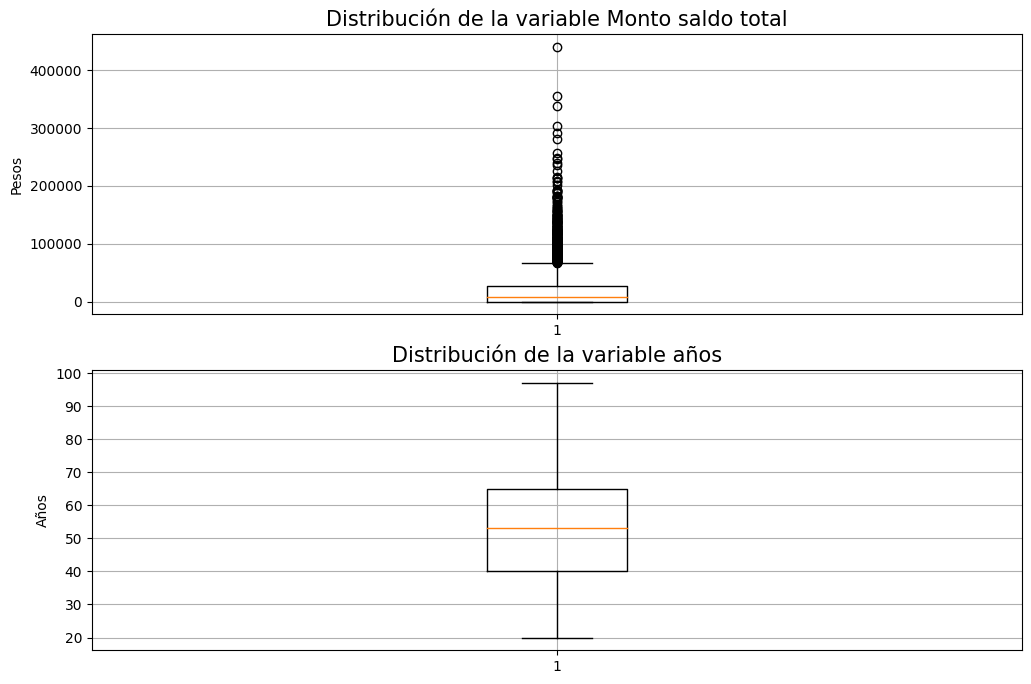

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.boxplot(data=df, x='CORDOBESA_MONTO_SALDO_TOTAL')
plt.ylabel('Pesos')
plt.title('Distribución de la variable Monto saldo total',size='15')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.boxplot(data=df, x='EDAD')
plt.ylabel('Años')
plt.title('Distribución de la variable años',size='15')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()



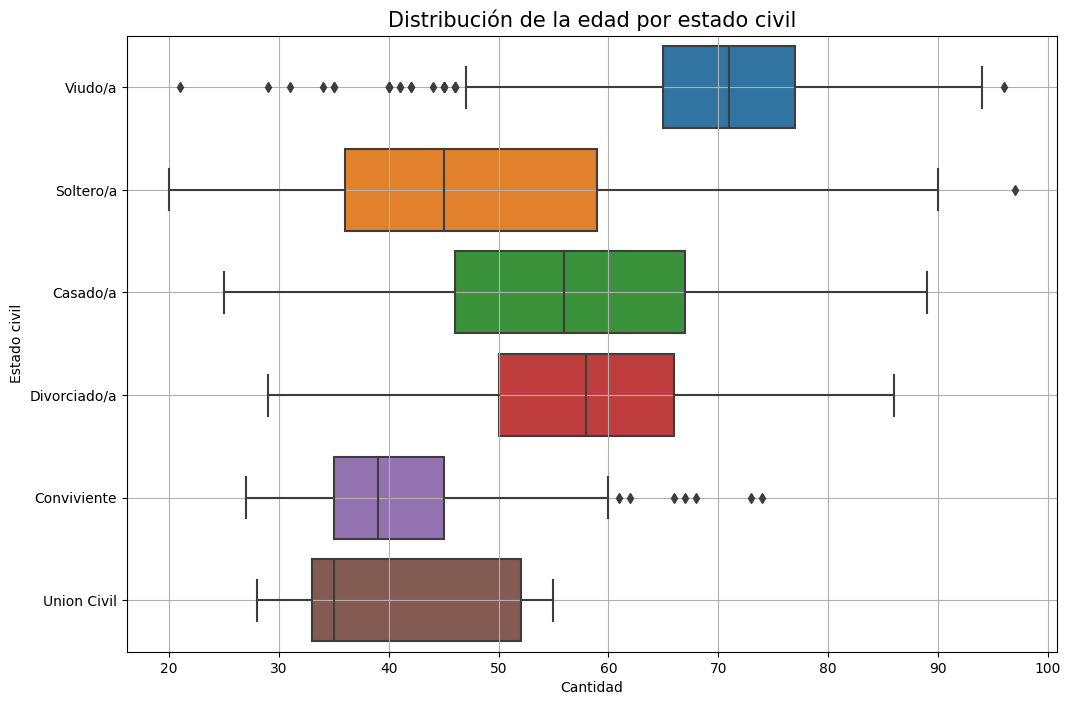

In [ ]:
# Se puede observar como es la distribucion de la edad para una variable categorica

plt.figure(figsize=(12,8))
sn.boxplot(x='EDAD', y='ESTADO_CIVIL', data=df)
plt.title("Distribución de la edad por estado civil",size='15')
plt.xlabel("Cantidad")
plt.ylabel("Estado civil")
plt.grid(True)
plt.show()



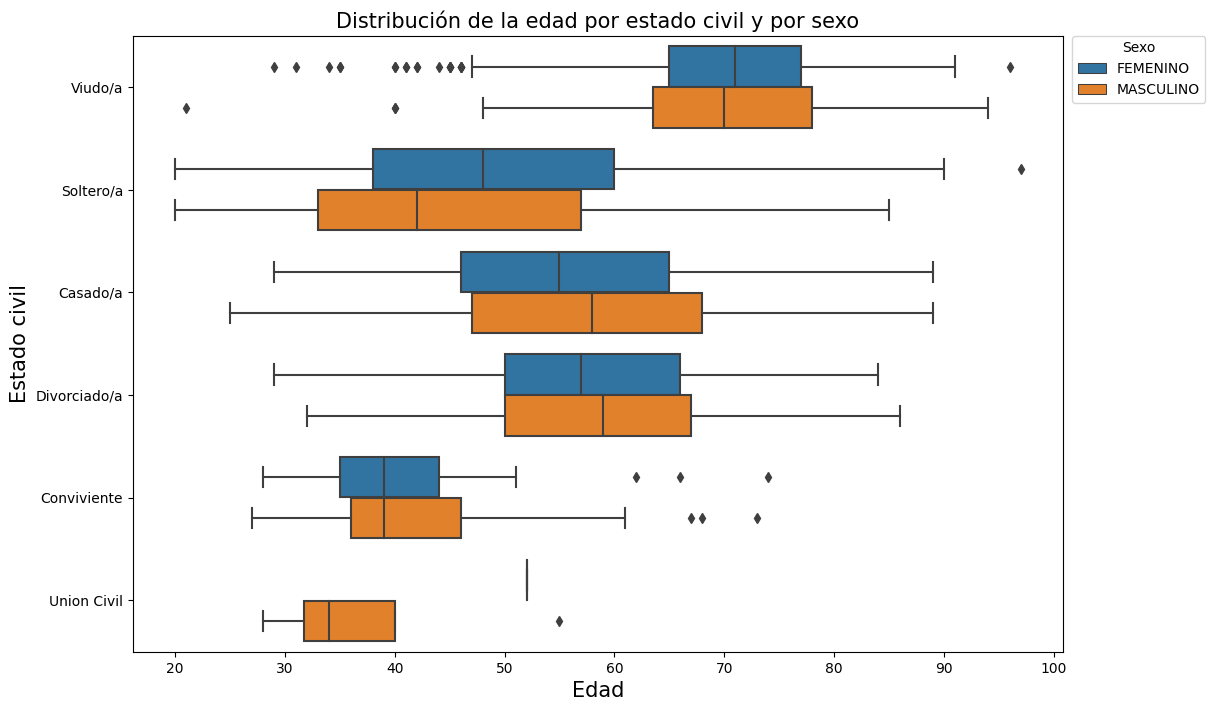

In [ ]:


plt.figure(figsize=(12,8))
sn.boxplot(y='ESTADO_CIVIL', x='EDAD', hue='SEXO', data=df)
plt.title("Distribución de la edad por estado civil y por sexo", size='15')
plt.xlabel("Edad",size='15')
plt.ylabel("Estado civil",size='15')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Sexo")
plt.show()

#Intervalos de confianza

 **Intervalo de confianza para la media Antigüedad en Cordobesa del dataset con varianza poblacional conocida**

In [ ]:
#Supuesto de varianza poblacional conocida = 50
media=np.mean(df['ANTIGUEDAD_CORDOBESA'])
desv_estandar=np.sqrt(np.var(df['ANTIGUEDAD_CORDOBESA']))
# ver como hacer cuando la variable no es normal
desv_estandar

40.82621657460581

In [ ]:
# Nivel de confianza
nivel_conf=0.95
# Varianza poblacional
var=50
# Datos muestrales
data=df['ANTIGUEDAD_CORDOBESA']

def ic(data,var,nivel_conf):
    n = len(data)
    z1 = st.norm.ppf((1-nivel_conf)/2)
    z2 = st.norm.ppf(nivel_conf+(1-nivel_conf)/2)
    data_mean = np.mean(data)
    data_sd =  stdev( data, data_mean)
    sigma=np.sqrt(var)
    lim_inf=data_mean+z1*sigma/n**0.5
    lim_sup=data_mean+z2*sigma/n**0.5
    return lim_inf,lim_sup,z1, z2, data_mean,data_sd,n

lim_inf,lim_sup,z1, z2, data_mean,data_sd,n = ic(data,var,nivel_conf)
print("Media Muestral =",data_mean)
print("S Muestral =",data_sd)
print("n muestral =",n)
print("z1 =", z1)
print("z2=", z2)
print("Intervalo de confianza: ","[",lim_inf,";",lim_sup,"]")

Media Muestral = 63.303619821912505
S Muestral = 40.82819243505825
n muestral = 10332
z1 = -1.959963984540054
z2= 1.959963984540054
Intervalo de confianza:  [ 63.16727429505508 ; 63.43996534876993 ]


**Intervalo de confianza para la media Antigüedad en Cordobesa del dataset con varianza poblacional desconocida**

In [ ]:
# Nivel de confianza
nivel_conf=0.95
# Datos muestrales
data=df['ANTIGUEDAD_CORDOBESA']
from scipy.stats import t

def ic(data,nivel_conf):
    n = len(data)
    t1 = t.ppf((1-nivel_conf)/2, n-1)
    t2 = t.ppf(nivel_conf+(1-nivel_conf)/2, n-1)
    data_mean = np.mean(data)
    sigma = stdev( data, data_mean)
    lim_inf=data_mean+t1*sigma/n**0.5
    lim_sup=data_mean+t2*sigma/n**0.5
    return lim_inf,lim_sup,t1,t2,data_mean,sigma,n

lim_inf,lim_sup,t1,t2,data_mean,sigma,n = ic(data,nivel_conf)
print("Media Muestral =",data_mean)
print("S Muestral =",sigma)
print("n muestral =",n)
print("t1 =", t1)
print("t2 =", t2)
print("Intervalo de confianza: ","[",lim_inf,";",lim_sup,"]")

Media Muestral = 63.303619821912505
S Muestral = 40.82819243505825
n muestral = 10332
t1 = -1.9601936374740356
t2 = 1.9601936374740356
Intervalo de confianza:  [ 62.51627145775555 ; 64.09096818606946 ]


 **Intervalo de confianza para la varianza de la variable Antigüedad en Cordobesa de nuestro dataset**

In [ ]:
# Nivel de confianza
nivel_conf=0.95
# Datos muestrales
data=df['ANTIGUEDAD_CORDOBESA']

def ic(data,nivel_conf):
    n = len(data)
    chi_1 = st.chi2.ppf(nivel_conf+(1-nivel_conf)/2,n-1)
    chi_2 = st.chi2.ppf(1-(nivel_conf+(1-nivel_conf)/2),n-1)
    data_mean = np.mean(data)
    data_sd = stdev( data, data_mean )
    var=data_sd**2
    lim_inf=(n-1)*var/chi_1
    lim_sup=(n-1)*var/chi_2
    return lim_inf,lim_sup,data_mean,var,n

lim_inf,lim_sup,data_mean,var,n = ic(data,nivel_conf)
print("Media Muestral =",data_mean)
print("Varianza Muestral =",var)
print("n Muestral")
print("Intervalo de confianza: ","[",lim_inf,";",lim_sup,"]")


Media Muestral = 63.303619821912505
Varianza Muestral = 1666.9412975141477
n Muestral
Intervalo de confianza:  [ 1622.4010024740685 ; 1713.3501326272938 ]


In [ ]:
print("Intervalo de confianza para la desviaciòn estandar es:","[", np.sqrt(lim_inf),";",np.sqrt(lim_sup),"]")

Intervalo de confianza para la desviaciòn estandar es: [ 40.279039244675 ; 41.39263379669496 ]


 **Intervalo de confianza para la proporción de clientes que tiene tarjeta visa en nuestro dataset**

In [ ]:
data_p = df[df.TIENE_TARJETA_VISA == 1].TIENE_TARJETA_VISA.count()/len(df['TIENE_TARJETA_VISA'])
n = len(data)
sigma =((data_p*(1-data_p))/n)**0.5
sigma

0.0045118305178215605

In [ ]:

# Nivel de confianza
nivel_conf=0.95
# proporcion
p=df[df.TIENE_TARJETA_VISA == 1].TIENE_TARJETA_VISA.count()/len(df['TIENE_TARJETA_VISA'])
# Datos muestrales
data=df['TIENE_TARJETA_VISA']

def ic(data,p,nivel_conf):
    n = len(data)
    z1 = st.norm.ppf((1-nivel_conf)/2)
    z2 = st.norm.ppf(nivel_conf+(1-nivel_conf)/2)
    data_p = df[df.TIENE_TARJETA_VISA == 1].TIENE_TARJETA_VISA.count()/len(df['TIENE_TARJETA_VISA'])
    sigma =((data_p*(1-data_p))/n)**0.5
    lim_inf=p+(z1*sigma)
    lim_sup=p+(z2*sigma)
    return lim_inf,lim_sup,z1, z2, data_p,n

lim_inf,lim_sup,z1,z2,data_p,n = ic(data,p,nivel_conf)
print("Prop Muestral =",data_p)
print("n muestral =",n)
print("z1 =", z1)
print("z2 =", z2)
print("proporcion", data_p)
print("Intervalo de confianza: ","[",lim_inf,";",lim_sup,"]")

Prop Muestral = 0.3008130081300813
n muestral = 10332
z1 = -1.959963984540054
z2 = 1.959963984540054
proporcion 0.3008130081300813
Intervalo de confianza:  [ 0.2919699828108024 ; 0.30965603344936027 ]
